In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

2025-02-20 15:49:29.525216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740041369.619912     397 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740041369.648097     397 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 15:49:29.867820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# image size and batch
img_size = (128, 128)
batch_size = 32

In [5]:
# Load datasets
raw_train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/train", image_size=img_size, batch_size=batch_size, shuffle=True
)
raw_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/test", image_size=img_size, batch_size=batch_size
)
# Get class names
class_names = raw_train_dataset.class_names
num_classes = len(class_names)
# Normalize pixel values (scale to [0,1])
normalization_layer = layers.Rescaling(1./255)
train_dataset = raw_train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = raw_test_dataset.map(lambda x, y: (normalization_layer(x), y))

print(f"Class Names: {class_names}")

Found 23699 files belonging to 10 classes.


I0000 00:00:1740041374.254221     397 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 2596 files belonging to 10 classes.
Class Names: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [6]:
# CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 15  # Adjust epochs as needed
model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs
)

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


I0000 00:00:1740041376.875953     570 service.cc:148] XLA service 0x7ff97c0079c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740041376.876497     570 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-20 15:49:36.988644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:49:37.010214: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740041377.285151     570 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-20 15:49:37.808818: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_o

  8/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.1547 - loss: 2.3778

I0000 00:00:1740041380.754737     570 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 25/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.1523 - loss: 2.3263

2025-02-20 15:49:41.199555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:49:41.391873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/741 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.1700 - loss: 2.2625

2025-02-20 15:49:43.309926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.1848 - loss: 2.2333

2025-02-20 15:49:45.097516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1973 - loss: 2.2084

2025-02-20 15:49:46.668963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1993 - loss: 2.2042

2025-02-20 15:49:46.912526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2028 - loss: 2.1962

2025-02-20 15:49:47.413219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/741 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2153 - loss: 2.1679

2025-02-20 15:49:49.297718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.2210 - loss: 2.1549

2025-02-20 15:49:50.247301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.2231 - loss: 2.1501

2025-02-20 15:49:50.605955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.2256 - loss: 2.1445

2025-02-20 15:49:51.005814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2297 - loss: 2.1353

2025-02-20 15:49:51.700191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:49:51.890630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2309 - loss: 2.1326

2025-02-20 15:49:51.938541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/741 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2427 - loss: 2.1061

2025-02-20 15:49:54.169642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


603/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2475 - loss: 2.0952

2025-02-20 15:49:55.064357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


651/741 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2531 - loss: 2.0823

2025-02-20 15:49:56.193440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


693/741 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2578 - loss: 2.0715

2025-02-20 15:49:57.206930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2628 - loss: 2.0596

2025-02-20 15:49:58.747392: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[19,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-20 15:49:58.825923: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[19,64,61,61]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,32,63,63]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2629 - loss: 2.0594

2025-02-20 15:50:01.396850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:01.486424: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-20 15:50:01.551644: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,61,61]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,63,63]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0})

741/741 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.2630 - loss: 2.0591 - val_accuracy: 0.4676 - val_loss: 1.5650
Epoch 2/15
  2/741 ━━━━━━━━━━━━━━━━━━━━ 1:41 137ms/step - accuracy: 0.4922 - loss: 1.5040

2025-02-20 15:50:03.504814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/741 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4388 - loss: 1.6279

2025-02-20 15:50:04.273534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/741 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4473 - loss: 1.6182

2025-02-20 15:50:05.608124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:05.774721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/741 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.4493 - loss: 1.6080

2025-02-20 15:50:08.005647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/741 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.4525 - loss: 1.5987

2025-02-20 15:50:09.590229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4533 - loss: 1.5965

2025-02-20 15:50:10.094792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4537 - loss: 1.5949

2025-02-20 15:50:10.451783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4570 - loss: 1.5850

2025-02-20 15:50:12.290056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4582 - loss: 1.5810

2025-02-20 15:50:13.127569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4588 - loss: 1.5790

2025-02-20 15:50:13.584928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:13.751038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4600 - loss: 1.5754

2025-02-20 15:50:14.330506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4606 - loss: 1.5738

2025-02-20 15:50:14.685969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:14.760996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4640 - loss: 1.5639

2025-02-20 15:50:16.965883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


622/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4666 - loss: 1.5566

2025-02-20 15:50:18.622713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


646/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4675 - loss: 1.5542

2025-02-20 15:50:19.222860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


682/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4689 - loss: 1.5505

2025-02-20 15:50:20.055758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


739/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4710 - loss: 1.5449

2025-02-20 15:50:21.623954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:22.083055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:22.083835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4711 - loss: 1.5446 - val_accuracy: 0.5177 - val_loss: 1.3768
Epoch 3/15
 13/741 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4818 - loss: 1.4684

2025-02-20 15:50:22.534054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5016 - loss: 1.4345

2025-02-20 15:50:22.883296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5082 - loss: 1.4239

2025-02-20 15:50:23.142505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/741 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5229 - loss: 1.3963

2025-02-20 15:50:24.214125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5322 - loss: 1.3698

2025-02-20 15:50:26.451201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5375 - loss: 1.3581

2025-02-20 15:50:28.130602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


265/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5386 - loss: 1.3556

2025-02-20 15:50:28.532740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:28.580094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/741 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5440 - loss: 1.3436

2025-02-20 15:50:30.700373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5464 - loss: 1.3376

2025-02-20 15:50:32.108847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:32.202733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5468 - loss: 1.3365

2025-02-20 15:50:32.437403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5479 - loss: 1.3336

2025-02-20 15:50:33.211888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:33.255758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:33.397270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/741 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5508 - loss: 1.3259

2025-02-20 15:50:35.413252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


601/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5521 - loss: 1.3224

2025-02-20 15:50:36.644165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


649/741 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5533 - loss: 1.3187

2025-02-20 15:50:37.970286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


691/741 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5544 - loss: 1.3155

2025-02-20 15:50:39.021014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5556 - loss: 1.3118

2025-02-20 15:50:40.394858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:40.908481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:40.972076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5557 - loss: 1.3117 - val_accuracy: 0.6233 - val_loss: 1.1019
Epoch 4/15
  1/741 ━━━━━━━━━━━━━━━━━━━━ 2:06 170ms/step - accuracy: 0.5938 - loss: 1.2795

2025-02-20 15:50:41.169389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6067 - loss: 1.1540

2025-02-20 15:50:41.691595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:41.788842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/741 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6061 - loss: 1.1402

2025-02-20 15:50:43.348250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6069 - loss: 1.1339

2025-02-20 15:50:45.515977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/741 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6080 - loss: 1.1325

2025-02-20 15:50:47.100079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6080 - loss: 1.1326

2025-02-20 15:50:47.359146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6082 - loss: 1.1324

2025-02-20 15:50:47.903163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


355/741 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6095 - loss: 1.1302

2025-02-20 15:50:49.752400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6105 - loss: 1.1286

2025-02-20 15:50:51.324541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:51.401735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:51.496394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6110 - loss: 1.1278

2025-02-20 15:50:52.042954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6113 - loss: 1.1273

2025-02-20 15:50:52.460900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:52.638735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/741 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6132 - loss: 1.1237

2025-02-20 15:50:54.785949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


592/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6138 - loss: 1.1222

2025-02-20 15:50:55.580013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


644/741 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6148 - loss: 1.1198

2025-02-20 15:50:56.886363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


691/741 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6158 - loss: 1.1174

2025-02-20 15:50:57.965833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6169 - loss: 1.1146

2025-02-20 15:50:59.357119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:59.774186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:50:59.939336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6169 - loss: 1.1146 - val_accuracy: 0.6445 - val_loss: 1.0523
Epoch 5/15
 11/741 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6322 - loss: 1.0073

2025-02-20 15:51:00.282363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/741 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6376 - loss: 1.0127

2025-02-20 15:51:00.702471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.6426 - loss: 1.0183

2025-02-20 15:51:01.453603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6462 - loss: 1.0187

2025-02-20 15:51:02.026607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6510 - loss: 1.0138

2025-02-20 15:51:04.205744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/741 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6541 - loss: 1.0083

2025-02-20 15:51:06.026467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6542 - loss: 1.0079

2025-02-20 15:51:06.229363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6545 - loss: 1.0073

2025-02-20 15:51:06.511540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6566 - loss: 1.0015

2025-02-20 15:51:08.631399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6576 - loss: 0.9991

2025-02-20 15:51:09.631839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6582 - loss: 0.9977

2025-02-20 15:51:10.265107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:10.412561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6588 - loss: 0.9961

2025-02-20 15:51:11.073263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:11.241279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6590 - loss: 0.9955

2025-02-20 15:51:11.361499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6606 - loss: 0.9911

2025-02-20 15:51:13.606851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


592/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6613 - loss: 0.9889

2025-02-20 15:51:14.562294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


642/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6622 - loss: 0.9862

2025-02-20 15:51:15.919122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


679/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6629 - loss: 0.9841

2025-02-20 15:51:16.888043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6640 - loss: 0.9808

2025-02-20 15:51:18.555329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:19.120254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:19.121362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6640 - loss: 0.9807 - val_accuracy: 0.6225 - val_loss: 1.1062
Epoch 6/15
  5/741 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5957 - loss: 0.9959

2025-02-20 15:51:19.414591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/741 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.6685 - loss: 0.9218

2025-02-20 15:51:19.989477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:20.185416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/741 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6878 - loss: 0.8837

2025-02-20 15:51:21.437528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/741 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.6932 - loss: 0.8774

2025-02-20 15:51:23.906697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/741 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6948 - loss: 0.8757

2025-02-20 15:51:25.555520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/741 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6951 - loss: 0.8753

2025-02-20 15:51:25.870149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


265/741 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6952 - loss: 0.8752

2025-02-20 15:51:26.076850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6963 - loss: 0.8730

2025-02-20 15:51:28.378772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6967 - loss: 0.8723

2025-02-20 15:51:29.297118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6969 - loss: 0.8721

2025-02-20 15:51:29.688980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


436/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6972 - loss: 0.8716

2025-02-20 15:51:30.335360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:30.528187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


455/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6973 - loss: 0.8714

2025-02-20 15:51:30.794902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6976 - loss: 0.8709

2025-02-20 15:51:31.620605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6985 - loss: 0.8691

2025-02-20 15:51:33.320893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6991 - loss: 0.8677

2025-02-20 15:51:34.238093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


641/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7000 - loss: 0.8656

2025-02-20 15:51:35.595480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


686/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7008 - loss: 0.8635

2025-02-20 15:51:36.687508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7019 - loss: 0.8608

2025-02-20 15:51:38.185525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:38.657392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:38.718966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7019 - loss: 0.8607 - val_accuracy: 0.6633 - val_loss: 1.0529
Epoch 7/15
  6/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7499 - loss: 0.6773

2025-02-20 15:51:39.122199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/741 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7477 - loss: 0.7060

2025-02-20 15:51:39.391791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7469 - loss: 0.7194

2025-02-20 15:51:39.702307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/741 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7432 - loss: 0.7376

2025-02-20 15:51:40.781363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7387 - loss: 0.7511

2025-02-20 15:51:43.065892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7394 - loss: 0.7523

2025-02-20 15:51:45.245877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7395 - loss: 0.7523

2025-02-20 15:51:45.571290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:45.618020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7403 - loss: 0.7510

2025-02-20 15:51:48.255615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7403 - loss: 0.7510

2025-02-20 15:51:48.540478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7404 - loss: 0.7508

2025-02-20 15:51:49.054796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:49.227268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7406 - loss: 0.7505

2025-02-20 15:51:49.957699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7407 - loss: 0.7504

2025-02-20 15:51:50.175413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:50.204482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


559/741 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7415 - loss: 0.7488

2025-02-20 15:51:52.513680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


597/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7420 - loss: 0.7477

2025-02-20 15:51:53.435816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


645/741 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7425 - loss: 0.7462

2025-02-20 15:51:54.614988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


683/741 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7429 - loss: 0.7449

2025-02-20 15:51:55.537650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7435 - loss: 0.7430

2025-02-20 15:51:57.122189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:57.587067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:57.631802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7436 - loss: 0.7429 - val_accuracy: 0.6837 - val_loss: 1.0453
Epoch 8/15
  9/741 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7870 - loss: 0.6290

2025-02-20 15:51:58.109879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/741 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7651 - loss: 0.6604

2025-02-20 15:51:58.510664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:51:58.692990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/741 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7618 - loss: 0.6609

2025-02-20 15:51:59.894732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/741 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7649 - loss: 0.6535

2025-02-20 15:52:02.008081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7656 - loss: 0.6530

2025-02-20 15:52:03.916059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7656 - loss: 0.6531

2025-02-20 15:52:04.131680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:04.154074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


371/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7666 - loss: 0.6513

2025-02-20 15:52:06.813090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7667 - loss: 0.6510

2025-02-20 15:52:07.378208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7669 - loss: 0.6505

2025-02-20 15:52:08.087312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:08.261759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7671 - loss: 0.6501

2025-02-20 15:52:08.671239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7672 - loss: 0.6499

2025-02-20 15:52:09.142710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:09.321491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/741 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7679 - loss: 0.6483

2025-02-20 15:52:11.435167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7682 - loss: 0.6475

2025-02-20 15:52:12.371191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


646/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7688 - loss: 0.6463

2025-02-20 15:52:13.840089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


679/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7691 - loss: 0.6455

2025-02-20 15:52:14.681547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7698 - loss: 0.6440

2025-02-20 15:52:16.436867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:16.882996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:16.985981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7698 - loss: 0.6439 - val_accuracy: 0.6772 - val_loss: 1.0847
Epoch 9/15
  6/741 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7812 - loss: 0.6238

2025-02-20 15:52:17.265663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8034 - loss: 0.5456

2025-02-20 15:52:18.269606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:18.397637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8052 - loss: 0.5425

2025-02-20 15:52:19.515401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8031 - loss: 0.5478

2025-02-20 15:52:21.774995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8024 - loss: 0.5511

2025-02-20 15:52:23.701901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8023 - loss: 0.5517

2025-02-20 15:52:24.020094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:24.044967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8020 - loss: 0.5533

2025-02-20 15:52:26.449775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8019 - loss: 0.5540

2025-02-20 15:52:27.319130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8019 - loss: 0.5544

2025-02-20 15:52:27.704779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


438/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8018 - loss: 0.5547

2025-02-20 15:52:27.999862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8017 - loss: 0.5555

2025-02-20 15:52:28.873760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:28.947438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:28.994381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


570/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8019 - loss: 0.5558

2025-02-20 15:52:31.248513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


603/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8021 - loss: 0.5556

2025-02-20 15:52:32.049203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


656/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8024 - loss: 0.5553

2025-02-20 15:52:33.462864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


702/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8027 - loss: 0.5547

2025-02-20 15:52:34.560503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8030 - loss: 0.5542

2025-02-20 15:52:35.678034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:36.150505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:36.271418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8030 - loss: 0.5542 - val_accuracy: 0.6876 - val_loss: 1.1317
Epoch 10/15
  1/741 ━━━━━━━━━━━━━━━━━━━━ 2:12 180ms/step - accuracy: 0.8125 - loss: 0.5826

2025-02-20 15:52:36.473819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8369 - loss: 0.4583

2025-02-20 15:52:37.096905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8351 - loss: 0.4596

2025-02-20 15:52:37.946683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8339 - loss: 0.4640

2025-02-20 15:52:38.379894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/741 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8284 - loss: 0.4824

2025-02-20 15:52:41.024038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/741 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8264 - loss: 0.4896

2025-02-20 15:52:42.954441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/741 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8262 - loss: 0.4905

2025-02-20 15:52:43.241784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:43.421347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


354/741 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8253 - loss: 0.4944

2025-02-20 15:52:45.888447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/741 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8249 - loss: 0.4955

2025-02-20 15:52:46.931158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/741 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8248 - loss: 0.4960

2025-02-20 15:52:47.527146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


424/741 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8247 - loss: 0.4961

2025-02-20 15:52:47.744757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/741 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8246 - loss: 0.4965

2025-02-20 15:52:48.319350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/741 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8245 - loss: 0.4967

2025-02-20 15:52:48.668825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:48.851205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


568/741 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8241 - loss: 0.4976

2025-02-20 15:52:51.534752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


592/741 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8241 - loss: 0.4975

2025-02-20 15:52:52.155518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


640/741 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8242 - loss: 0.4975

2025-02-20 15:52:53.400512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


681/741 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8242 - loss: 0.4971

2025-02-20 15:52:54.444645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


739/741 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8245 - loss: 0.4964

2025-02-20 15:52:56.123424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:56.597901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:52:56.755785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8245 - loss: 0.4964 - val_accuracy: 0.6664 - val_loss: 1.2793
Epoch 11/15
  6/741 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.7742 - loss: 0.6085

2025-02-20 15:52:56.973997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/741 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7980 - loss: 0.5342

2025-02-20 15:52:57.861246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/741 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8015 - loss: 0.5234

2025-02-20 15:52:58.151339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8137 - loss: 0.4948

2025-02-20 15:52:59.306466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8208 - loss: 0.4816

2025-02-20 15:53:01.629455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8233 - loss: 0.4768

2025-02-20 15:53:03.516894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8236 - loss: 0.4761

2025-02-20 15:53:03.837596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/741 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8242 - loss: 0.4750

2025-02-20 15:53:04.296587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8260 - loss: 0.4713

2025-02-20 15:53:06.230303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8267 - loss: 0.4701

2025-02-20 15:53:07.135797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:07.234059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8269 - loss: 0.4695

2025-02-20 15:53:07.596156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8275 - loss: 0.4684

2025-02-20 15:53:08.396023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8276 - loss: 0.4681

2025-02-20 15:53:08.639966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8278 - loss: 0.4677

2025-02-20 15:53:08.886056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8291 - loss: 0.4648

2025-02-20 15:53:11.034689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


607/741 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8295 - loss: 0.4641

2025-02-20 15:53:11.614202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


657/741 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8303 - loss: 0.4624

2025-02-20 15:53:12.870977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


701/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8310 - loss: 0.4609

2025-02-20 15:53:13.881529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


739/741 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8315 - loss: 0.4595

2025-02-20 15:53:15.034558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:15.458476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:15.619340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8316 - loss: 0.4594 - val_accuracy: 0.6884 - val_loss: 1.2187
Epoch 12/15
  5/741 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.7473 - loss: 0.5284

2025-02-20 15:53:15.805537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/741 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8185 - loss: 0.4360

2025-02-20 15:53:16.299233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8316 - loss: 0.4310

2025-02-20 15:53:16.974688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8350 - loss: 0.4309

2025-02-20 15:53:17.646760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8427 - loss: 0.4215

2025-02-20 15:53:20.492506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/741 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8438 - loss: 0.4195

2025-02-20 15:53:21.809628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/741 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8439 - loss: 0.4193

2025-02-20 15:53:22.034838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8441 - loss: 0.4190

2025-02-20 15:53:22.415460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8455 - loss: 0.4159

2025-02-20 15:53:24.820982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8459 - loss: 0.4153

2025-02-20 15:53:25.911100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:26.075571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8462 - loss: 0.4150

2025-02-20 15:53:26.714824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:26.767795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8462 - loss: 0.4150

2025-02-20 15:53:27.177347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:27.231116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8468 - loss: 0.4142

2025-02-20 15:53:29.748668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8469 - loss: 0.4138

2025-02-20 15:53:30.341183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


645/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8474 - loss: 0.4129

2025-02-20 15:53:31.674986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


682/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8478 - loss: 0.4121

2025-02-20 15:53:32.536752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8484 - loss: 0.4106

2025-02-20 15:53:34.131888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:34.606923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:34.662441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8484 - loss: 0.4105 - val_accuracy: 0.6791 - val_loss: 1.2721
Epoch 13/15
  6/741 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.8155 - loss: 0.4052

2025-02-20 15:53:34.913125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/741 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8485 - loss: 0.3750

2025-02-20 15:53:35.374376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8563 - loss: 0.3664

2025-02-20 15:53:35.765814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8653 - loss: 0.3606

2025-02-20 15:53:36.843867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8698 - loss: 0.3620

2025-02-20 15:53:39.289676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/741 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8699 - loss: 0.3632

2025-02-20 15:53:40.732783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8699 - loss: 0.3633

2025-02-20 15:53:41.032021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/741 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8699 - loss: 0.3634

2025-02-20 15:53:41.459535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/741 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8703 - loss: 0.3630

2025-02-20 15:53:43.365374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8705 - loss: 0.3627

2025-02-20 15:53:44.373394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/741 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8706 - loss: 0.3625

2025-02-20 15:53:44.712639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


419/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8707 - loss: 0.3624

2025-02-20 15:53:44.981174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/741 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8709 - loss: 0.3620

2025-02-20 15:53:45.803315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8709 - loss: 0.3619

2025-02-20 15:53:46.080392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/741 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8709 - loss: 0.3619

2025-02-20 15:53:46.281978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8712 - loss: 0.3612

2025-02-20 15:53:48.950518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8712 - loss: 0.3611

2025-02-20 15:53:49.254804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


683/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8714 - loss: 0.3605

2025-02-20 15:53:51.542738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


694/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8714 - loss: 0.3604

2025-02-20 15:53:51.843172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8715 - loss: 0.3599

2025-02-20 15:53:53.219827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:53.666450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:53.695565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8716 - loss: 0.3599 - val_accuracy: 0.6841 - val_loss: 1.3957
Epoch 14/15
  5/741 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8816 - loss: 0.3352

2025-02-20 15:53:53.983025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/741 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8898 - loss: 0.3035

2025-02-20 15:53:54.987904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:53:55.014710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8895 - loss: 0.3032

2025-02-20 15:53:56.009033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8843 - loss: 0.3187

2025-02-20 15:53:58.466144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/741 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8827 - loss: 0.3228

2025-02-20 15:54:00.138994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8825 - loss: 0.3232

2025-02-20 15:54:00.389757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:00.564881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8809 - loss: 0.3270

2025-02-20 15:54:02.695780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8804 - loss: 0.3285

2025-02-20 15:54:03.791287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8802 - loss: 0.3290

2025-02-20 15:54:04.315983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:04.490508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8798 - loss: 0.3302

2025-02-20 15:54:05.335613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:05.415311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:05.515983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8789 - loss: 0.3325

2025-02-20 15:54:07.865676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


598/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8787 - loss: 0.3331

2025-02-20 15:54:08.754857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


651/741 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8786 - loss: 0.3337

2025-02-20 15:54:10.114248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


690/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8785 - loss: 0.3339

2025-02-20 15:54:11.121824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8784 - loss: 0.3342

2025-02-20 15:54:12.524306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:12.988389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:13.026039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8784 - loss: 0.3342 - val_accuracy: 0.6845 - val_loss: 1.4561
Epoch 15/15
  1/741 ━━━━━━━━━━━━━━━━━━━━ 2:11 178ms/step - accuracy: 0.9062 - loss: 0.3119

2025-02-20 15:54:13.326640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/741 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9016 - loss: 0.2868

2025-02-20 15:54:13.774866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/741 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9027 - loss: 0.2838

2025-02-20 15:54:14.229895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/741 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8987 - loss: 0.2928

2025-02-20 15:54:15.318938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/741 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8932 - loss: 0.3069

2025-02-20 15:54:17.898391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/741 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8918 - loss: 0.3110

2025-02-20 15:54:19.435076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/741 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8917 - loss: 0.3114

2025-02-20 15:54:19.761901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:19.842415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/741 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8914 - loss: 0.3111

2025-02-20 15:54:22.296096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8914 - loss: 0.3106

2025-02-20 15:54:23.102657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/741 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8913 - loss: 0.3103

2025-02-20 15:54:23.477818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8913 - loss: 0.3100

2025-02-20 15:54:23.897146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/741 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8913 - loss: 0.3096

2025-02-20 15:54:24.426155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/741 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8913 - loss: 0.3095

2025-02-20 15:54:24.794119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:24.873308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/741 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8911 - loss: 0.3086

2025-02-20 15:54:27.037535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


592/741 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8911 - loss: 0.3083

2025-02-20 15:54:27.945682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


664/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8911 - loss: 0.3078

2025-02-20 15:54:29.700592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


698/741 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8911 - loss: 0.3076

2025-02-20 15:54:30.482249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8910 - loss: 0.3073

2025-02-20 15:54:31.697198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:32.110743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-02-20 15:54:32.275694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8910 - loss: 0.3073 - val_accuracy: 0.6984 - val_loss: 1.4133


In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
# test 
img_path = "image.png"  
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0) 
# Predict class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted Class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step

2025-02-20 16:01:17.507997: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,30,30]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
Predicted Class: dog


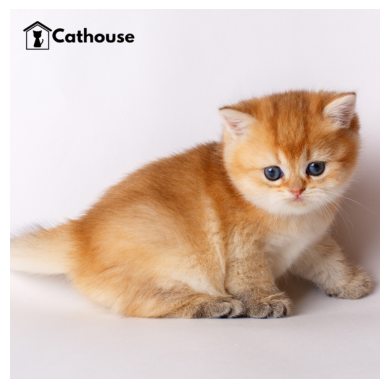

In [ ]:
import matplotlib.image as mpimg
# Load the image
img = mpimg.imread("image.png")
# Display the image
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()